

## Preprocess the Data


In [ ]:
# Imports
import csv
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd /content/drive/Shareddrives/'Curriculum Project'

/content/drive/Shareddrives/Curriculum Project


Parsing the CSV File:

In [ ]:
# Parse CSV File
tweets = []
with open("data/tweets.csv", "r", encoding="utf-8", errors="ignore") as csv_file:
    reader = csv.reader(csv_file)

    for row in reader:
        tweets.append(row)

In [ ]:
# Split into positive and negative tweets
pos = []
neg = []

for tweet in tweets:
  if(tweet[0] == '0'): 
    neg.append(tweet[5])
  else:
    pos.append(tweet[5])

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(neg))
plt.title("Word Cloud for Preprocessed Negative Tweets")
plt.imshow(wc , interpolation = 'bilinear')

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(pos))
plt.title("Word Cloud for Preprocessed Positive Tweets")
plt.imshow(wc , interpolation = 'bilinear')

Output hidden; open in https://colab.research.google.com to view.

Removing All Tweets With Emoticons (or just all special characters): \\
:) :( :-) :-( : ) : ( :D =)

In [16]:
processedTweets = []

# Maintain list of emoticons
# emoticons = [":)", ":(", ":-)", ":-(", ": )", ":D", "=)", ": ("]
emoticons = ['`', '!', '@', '#', '$', '%', '^', '&' ,'*' ,'(',')','_','+','\\','-','=','[',']','{','}',';',':','"','|',',','.','<','>','/','?','~', '\'']

# Iterate through tweets
for tweet in tweets:
  processedTweet = tweet
  for e in emoticons:
    while e in processedTweet[5]:
      processedTweet[5] = processedTweet[5].replace(e, "")

  processedTweets.append(processedTweet)




Remove stop words (common words such as 'i', 'me', ...)

In [9]:
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
processedTweets2 = []


# Iterate through tweets to remove stopwords
stop = stopwords.words('english')

# Other words to ignore
ignore = ['http', 'amp', 'quot', 'twitpic', 'tinyurl']

for tweet in processedTweets:
  tweet2 = tweet

  old = tweet2[5].split()
  new = []

  for w in old:
    if w.lower() not in stop:
      # Skip word if link
      if 'http' in w.lower() or 'bit.ly' in w.lower():
        continue
      
      # Remove ignored words
      for i in ignore:
        while i in w.lower():
          w = w.lower().replace(i, "")

      new.append(w.lower())
  
  tweet2[5] = ' '.join(new)
  
  processedTweets2.append(tweet2)


if(len(processedTweets2) >= len(processedTweets)): processedTweets = processedTweets2

Save to processed folder:

In [20]:
# Save as new .csv file

# open the file in the write mode
with open("processed/processedtweets.csv", 'w') as f:
    # create the csv writer
    writer = csv.writer(f)

    # Iterate through each tweet
    for tweet in processedTweets:
      writer.writerow(tweet)

Visualize:

In [21]:
# Split into positive and negative tweets
pos = []
neg = []

for tweet in processedTweets:
  if(tweet[0] == '0'): 
    neg.append(tweet[5])
  else:
    pos.append(tweet[5])

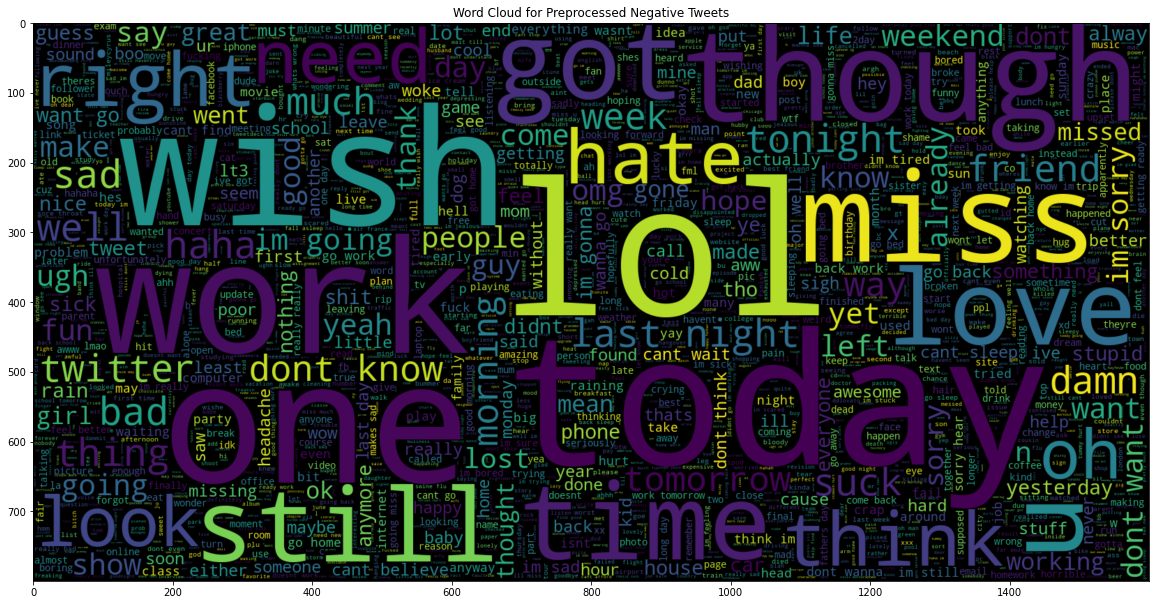

In [22]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(neg))
plt.title("Word Cloud for Preprocessed Negative Tweets")
plt.imshow(wc , interpolation = 'bilinear')

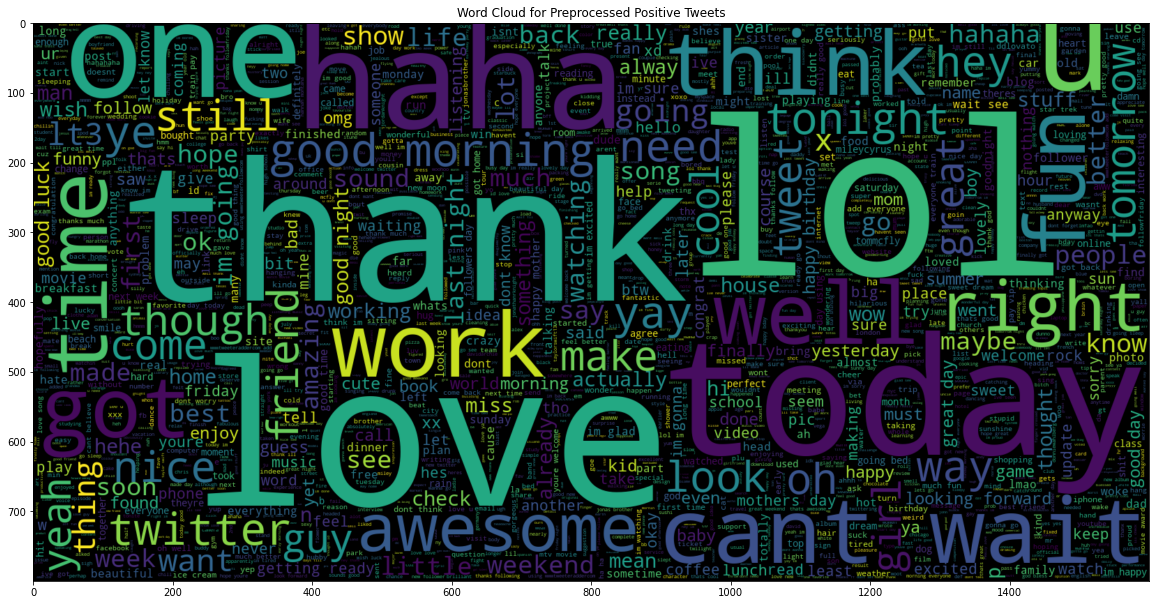

In [23]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(pos))
plt.title("Word Cloud for Preprocessed Positive Tweets")
plt.imshow(wc , interpolation = 'bilinear')